In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
df = pd.read_csv("C:\datasets/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [27]:
# lyingRigh과 lyingBack을 lying으로 변환
df['activity'] = df['activity'].replace({'lyingRigh': 'lying', 'lyingBack': 'lying'})

In [28]:
print(df['activity'].value_counts())

lying                      960
sitting                    480
runningTreadmill           480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
walkingTreadmillIncline    480
standing                   480
walkingTreadmillFlat       480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
basketBall                 480
Name: activity, dtype: int64


In [29]:
df_filtered = df[df['activity'].isin(['sitting', 'lying'])]
df_filtered = df_filtered.drop('people', axis = 1)
df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,9.195642e-05,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,lying
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,7.375030e-05,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,lying
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,3.380089e-05,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,lying
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,9.044032e-05,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,lying


In [30]:
df_filtered['activity'].value_counts()

lying      960
sitting    480
Name: activity, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])

df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,9.195642e-05,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,7.375030e-05,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,3.380089e-05,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,9.044032e-05,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,0


In [32]:
LABELS = ["Normal", "Abnormal"]

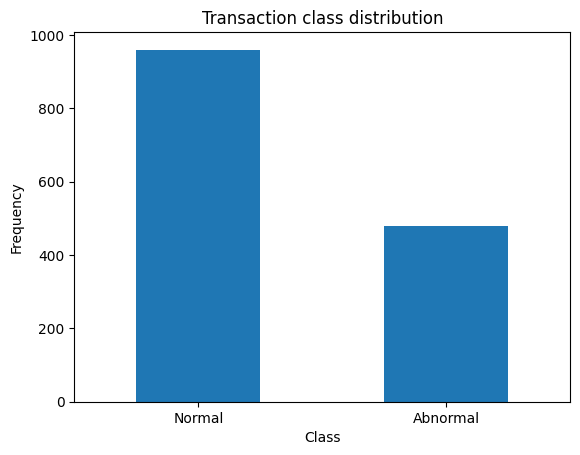

In [33]:
count_classes = df_filtered.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [34]:
frauds = df_filtered[df_filtered.activity == 1]
normal = df_filtered[df_filtered.activity == 0]
frauds.shape

(480, 271)

In [35]:
normal.shape

(960, 271)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_filtered, test_size=0.2, random_state=20)

X_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
251,6.907151,6.9812,6.80220,0.001179,0.034335,-0.738872,-0.492903,-0.44488,-0.556230,0.000400,...,4.446731e-07,0.000667,-0.094248,0.289049,0.29101,0.28730,5.273868e-07,0.000726,0.247532,1
1014,-4.634902,-4.5576,-4.70720,0.001062,0.032595,-0.022600,-0.661550,-0.60246,-0.749640,0.000870,...,4.187223e-07,0.000647,0.278959,-0.525365,-0.52338,-0.52752,5.237589e-07,0.000724,0.128404,0
1123,-3.409643,-3.3525,-3.44950,0.000450,0.021217,0.131701,0.089917,0.17925,-0.013255,0.000816,...,6.329016e-07,0.000796,0.109761,0.958187,0.95964,0.95647,4.227273e-07,0.000650,-0.108056,0
255,6.912211,6.9887,6.80960,0.001304,0.036109,-0.259652,-0.480467,-0.41502,-0.563900,0.000658,...,4.680509e-07,0.000684,0.076878,0.288878,0.29097,0.28692,6.552235e-07,0.000809,0.021481,1
1739,-0.526025,-0.4724,-0.58415,0.000481,0.021937,-0.224470,-9.782885,-9.70040,-9.899600,0.000914,...,5.670998e-07,0.000753,-0.023755,-0.615915,-0.61433,-0.61733,4.237524e-07,0.000651,-0.076690,0


In [37]:
X_train = X_train[X_train.activity == 0]

y_train = X_train['activity']
y_test = X_test['activity']

X_train = X_train.drop(['activity'], axis=1)
X_test = X_test.drop(['activity'], axis=1)

X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
1014,-4.634902,-4.55760,-4.70720,0.001062,0.032595,-0.022600,-0.661550,-0.60246,-0.749640,0.000870,...,0.56874,4.187223e-07,0.000647,0.278959,-0.525365,-0.52338,-0.52752,5.237589e-07,0.000724,0.128404
1123,-3.409643,-3.35250,-3.44950,0.000450,0.021217,0.131701,0.089917,0.17925,-0.013255,0.000816,...,0.15655,6.329016e-07,0.000796,0.109761,0.958187,0.95964,0.95647,4.227273e-07,0.000650,-0.108056
1739,-0.526025,-0.47240,-0.58415,0.000481,0.021937,-0.224470,-9.782885,-9.70040,-9.899600,0.000914,...,-0.24838,5.670998e-07,0.000753,-0.023755,-0.615915,-0.61433,-0.61733,4.237524e-07,0.000651,-0.076690
1621,1.377745,1.45280,1.30350,0.000999,0.031604,-0.086084,-7.159021,-7.04850,-7.292300,0.003269,...,-0.47861,1.425414e-06,0.001194,-0.197761,-0.451662,-0.44930,-0.45347,6.531650e-07,0.000808,0.044336
1126,-3.482634,-3.27030,-3.65750,0.004737,0.068826,-0.061431,0.104506,0.38740,-0.176550,0.005428,...,0.18712,6.866827e-06,0.002620,0.408001,0.953577,0.95572,0.95179,6.165219e-07,0.000785,0.162851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,2.615501,2.65270,2.57710,0.000193,0.013907,-0.316697,-9.393974,-9.34970,-9.422400,0.000170,...,-0.54617,8.157775e-05,0.009032,0.184982,-0.411386,-0.37905,-0.43545,8.429205e-05,0.009181,0.321726
1722,-0.573965,-0.53322,-0.62313,0.000382,0.019550,-0.268467,-9.755309,-9.68750,-9.865300,0.000733,...,-0.24918,7.020958e-07,0.000838,0.034115,-0.614781,-0.61310,-0.61652,4.993076e-07,0.000707,-0.144932
1404,-1.708773,-1.64450,-1.78080,0.001219,0.034918,0.014185,-2.296489,-2.21340,-2.399400,0.001017,...,0.31915,1.068923e-04,0.010339,0.148356,-0.638062,-0.59517,-0.66246,8.761269e-05,0.009360,0.781610
1727,-0.549961,-0.47365,-0.60789,0.000854,0.029227,0.253378,-9.760238,-9.63570,-9.865000,0.001462,...,-0.24864,5.190850e-07,0.000720,-0.038855,-0.614830,-0.61320,-0.61668,4.595047e-07,0.000678,-0.010921


In [38]:
# X_train과 X_test를 넘파이 배열로 변환
X_train = X_train.values
X_test = X_test.values

X_train

array([[-4.63490160e+00, -4.55760000e+00, -4.70720000e+00, ...,
         5.23758942e-07,  7.23711919e-04,  1.28404286e-01],
       [-3.40964320e+00, -3.35250000e+00, -3.44950000e+00, ...,
         4.22727329e-07,  6.50174845e-04, -1.08055791e-01],
       [-5.26025360e-01, -4.72400000e-01, -5.84150000e-01, ...,
         4.23752426e-07,  6.50962692e-04, -7.66900427e-02],
       ...,
       [-1.70877280e+00, -1.64450000e+00, -1.78080000e+00, ...,
         8.76126937e-05,  9.36016526e-03,  7.81610289e-01],
       [-5.49961120e-01, -4.73650000e-01, -6.07890000e-01, ...,
         4.59504735e-07,  6.77867786e-04, -1.09212871e-02],
       [ 3.74031040e-01,  4.26930000e-01,  3.37360000e-01, ...,
         4.04055845e-07,  6.35653872e-04,  6.64209337e-02]])

In [39]:
# 인코더 차원과 디코더 차원 설정
input_dim = X_train.shape[1]
encoding_dim = 32  # 잠재 공간의 차원

# 1. 인코더 정의
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)  # 첫 번째 비선형 레이어 (ReLU)
encoded = Dense(64, activation='relu')(encoded)  # 두 번째 비선형 레이어 (ReLU)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # 잠재 공간 (Latent Space)

# 2. 디코더 정의
decoded = Dense(64, activation='relu')(encoded)  # 잠재 공간에서 다시 복원 (ReLU)
decoded = Dense(128, activation='relu')(decoded)  # 비선형 디코더 레이어 (ReLU)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 원래 입력 차원으로 복원

# 3. 오토인코더 모델 구성
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 4. 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용

history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 [==============================] - 4s 253ms/step - loss: 5.7612 - val_loss: 5.6073
Epoch 2/50
3/3 [==============================] - 0s 52ms/step - loss: 5.6747 - val_loss: 5.4952
Epoch 3/50
3/3 [==============================] - 0s 57ms/step - loss: 5.5447 - val_loss: 5.3277
Epoch 4/50
3/3 [==============================] - 0s 53ms/step - loss: 5.3698 - val_loss: 5.1431
Epoch 5/50
3/3 [==============================] - 0s 53ms/step - loss: 5.1951 - val_loss: 5.0016
Epoch 6/50
3/3 [==============================] - 0s 51ms/step - loss: 5.0744 - val_loss: 4.9258
Epoch 7/50
3/3 [==============================] - 0s 54ms/step - loss: 5.0097 - val_loss: 4.8885
Epoch 8/50
3/3 [==============================] - 0s 53ms/step - loss: 4.9778 - val_loss: 4.8716
Epoch 9/50
3/3 [==============================] - 0s 55ms/step - loss: 4.9626 - val_loss: 4.8545
Epoch 10/50
3/3 [==============================] - 0s 54ms/step - loss: 4.9502 - val_loss: 4.8479
Epoch 11/50
3/3 [===========

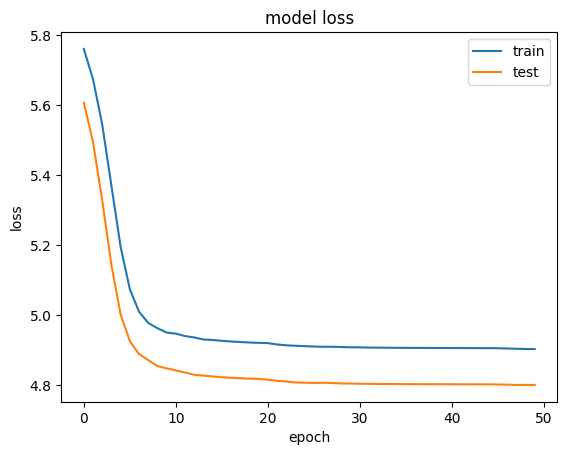

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [42]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

9/9 [==============================] - 0s 5ms/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,4.834166,0.340278
std,0.222390,0.474627
min,4.506924,0.000000
25%,4.667823,0.000000
50%,4.808554,0.000000
75%,4.934932,1.000000
max,5.783880,1.000000


In [43]:
threshold = np.percentile(error_df['reconstruction_error'], 95)  # 95번째 백분위수

threshold

5.221977446151211

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(error_df['true_class'], error_df['reconstruction_error'])
optimal_idx = np.argmax(tpr - fpr)  # TPR - FPR이 최대가 되는 곳
optimal_threshold = thresholds[optimal_idx]

optimal_threshold

4.6629321054769175

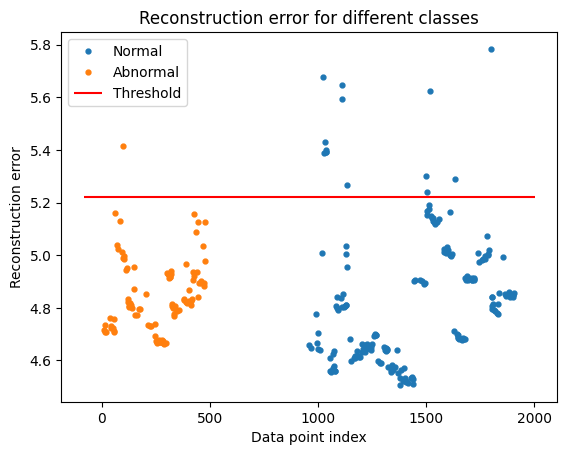

In [45]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

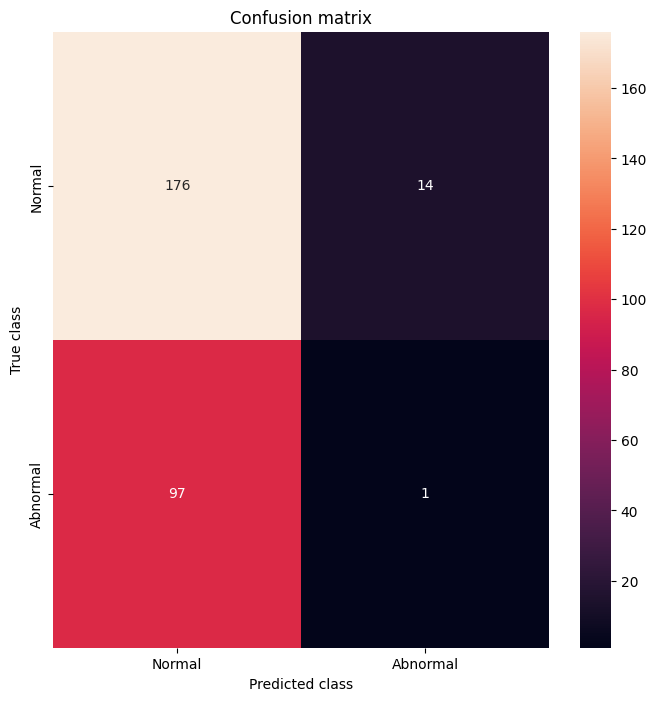

              precision    recall  f1-score   support

           0       0.64      0.93      0.76       190
           1       0.07      0.01      0.02        98

    accuracy                           0.61       288
   macro avg       0.36      0.47      0.39       288
weighted avg       0.45      0.61      0.51       288



In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))